In [1]:
import os
import librosa
import numpy as np
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\agarw\anaconda3\envs\MasterEnv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\agarw\anaconda3\envs\MasterEnv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\agarw\anaconda3\envs\MasterEnv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
pwd = os.getcwd()
audio_files = os.listdir(pwd + "\Genres_10")
print(audio_files)

['blues00000_8sec_16000.wav', 'classical00000_8sec_16000.wav', 'country00000_8sec_16000.wav', 'disco00000_8sec_16000.wav', 'hiphop00000_8sec_16000.wav', 'jazz00000_8sec_16000.wav', 'metal00000_8sec_16000.wav', 'pop00000_8sec_16000.wav', 'reggae00000_8sec_16000.wav', 'rock00000_8sec_16000.wav']


In [5]:

# fig, axs = plt.subplots(10, 1, figsize=(15, 30), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)
audio_files_data = []
for idx in range(len(audio_files)):
    audio_data, sr = librosa.load(pwd + '\Genres_10/' + audio_files[idx], sr=None)
    audio_files_data.append(audio_data)
#     axs[idx].plot(audio_data)
#     axs[idx].set_title(audio_files[idx].split('_')[0])
    
# plt.show()

# Zero Crosssing Rate
1. It is defined as the number of times a signal varies from +ve to 0 to -ve  or  -ve to 0 to +ve
2. This is used in speech recognition and MIR.
3. This can be used for pitch detection for monophonic toanl signals.
4. Voice activity detection.

In [6]:
zcr_data = []
for idx in range(len(audio_files_data)):
    zcr = librosa.feature.zero_crossing_rate(audio_files_data[idx], frame_length=1024,hop_length=512)
    zcr_data.append(zcr)
print(zcr_data[0][0].shape)
# print(zcr_data)

(251,)


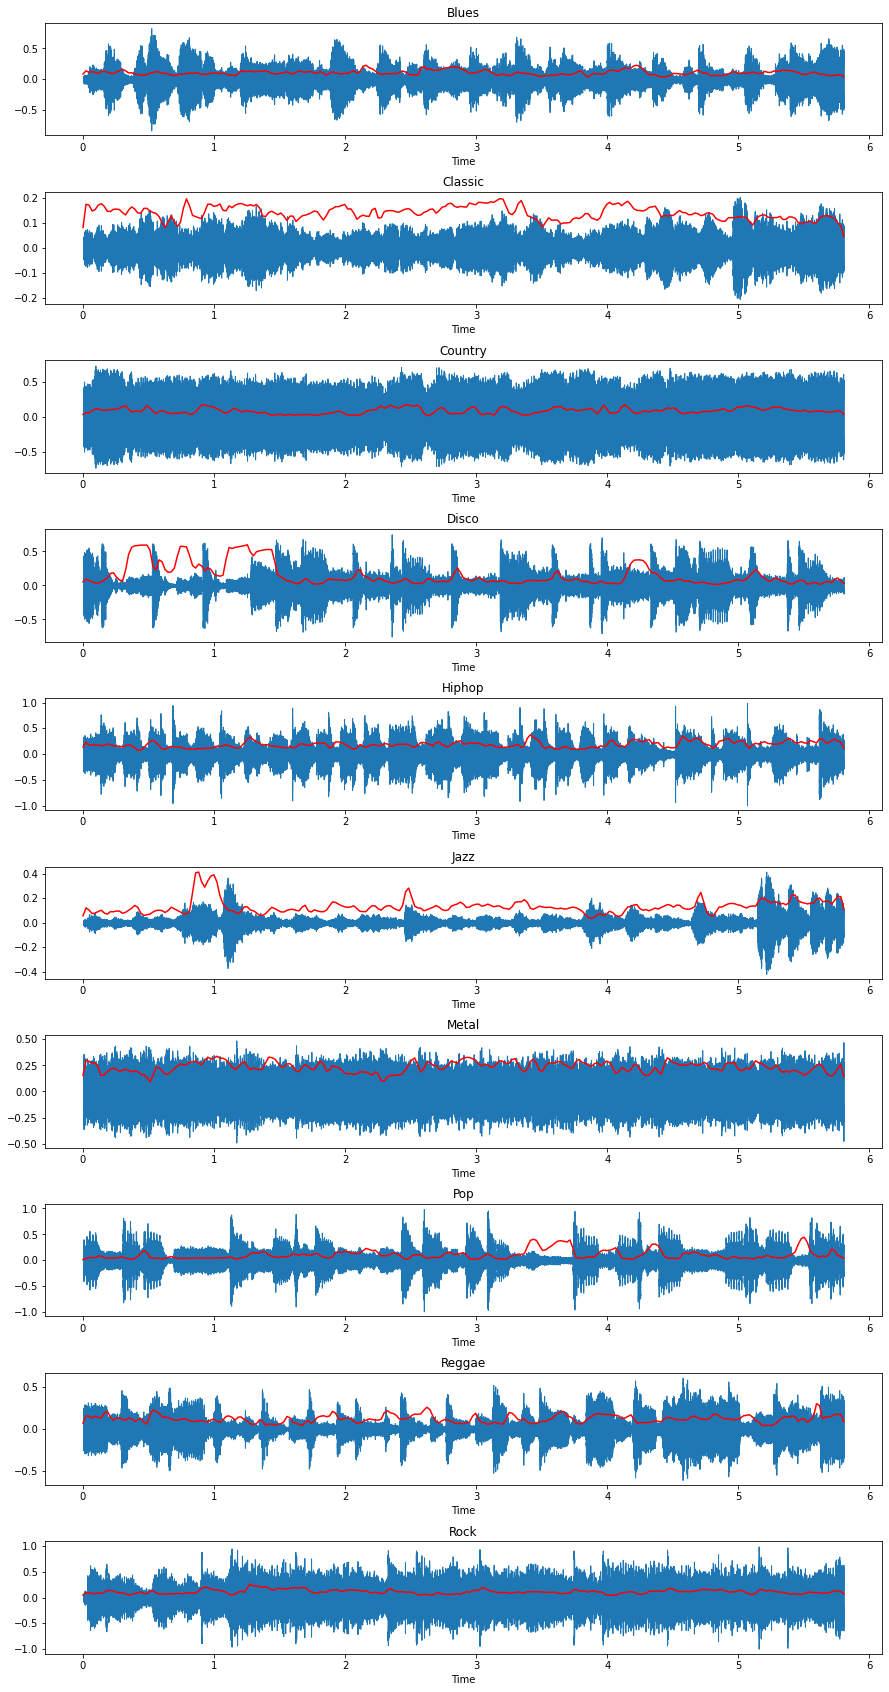

In [7]:
Genres_names = ['Blues', 'Classic', 'Country', 'Disco', 'Hiphop', 'Jazz', 'Metal', 'Pop', 'Reggae', 'Rock']
fig, axs = plt.subplots(10, 1, figsize=(15, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

frames = range(len(zcr_data[0][0]))
t = librosa.frames_to_time(frames, hop_length=512)
for idx in range(len(audio_files_data)):
    librosa.display.waveshow(audio_files_data[idx], ax=axs[idx])
    axs[idx].plot(t,zcr_data[idx][0],color="r")
    axs[idx].set_title(Genres_names[idx])


plt.show()

In [8]:
zcr_avg = []
for idx in range(len(zcr_data)):
    print(Genres_names[idx] + " : ", sum(zcr_data[idx][0])/len(zcr_data[idx][0]))
    zcr_avg.append(sum(zcr_data[idx][0])/len(zcr_data[idx][0]))

Blues :  0.10593563247011953
Classic :  0.1409362549800797
Country :  0.08342022534860558
Disco :  0.14907946339641434
Hiphop :  0.1837882843625498
Jazz :  0.13166863794820718
Metal :  0.23351515811752988
Pop :  0.10552711030876494
Reggae :  0.11973979083665338
Rock :  0.11322288969123506


Text(0, 0.5, 'ZCR')

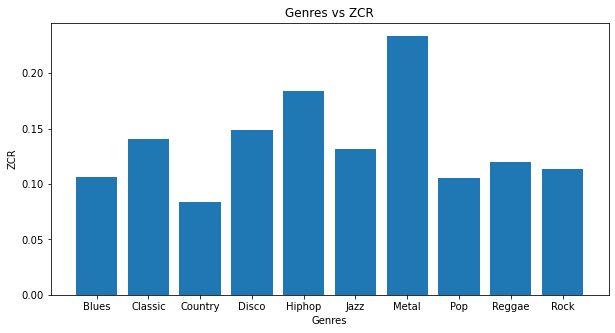

In [9]:
plt.figure(figsize=(10,5))
plt.bar(Genres_names, zcr_avg)
plt.title("Genres vs ZCR")
plt.xlabel("Genres")
plt.ylabel("ZCR")